<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/07_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인피니티북스 "누구나 쉽게 배우는 딥러닝 스타트"(1판) 교재 소스 코드**


## **7장 텐서플로로 구현하는 딥러닝**
---
* 출판사 : 인피니티북스( https://www.infinitybooks.co.kr )
* 저자 : 박동규
* 소스코드 저장소 : https://github.com/dongupak/DLstart
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저자 표기와 함께 배포해 주십시오.
 * https://www.yes24.com/Product/Goods/124152667
 * 책의 오류는 dongupak@gmail.com 으로 알려주십시오.
---

### 01 딥러닝을 위한 도구 : 텐서플로
#### 텐서플로와 MNIST 데이터

In [ ]:
# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) =\
    mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print('train_images.shape =', train_images.shape)
print('test_images.shape =', test_images.shape)
print('train_labels.shape =', train_labels.shape)
print('test_labels.shape =', test_labels.shape)

train_images.shape = (60000, 28, 28)
test_images.shape = (10000, 28, 28)
train_labels.shape = (60000,)
test_labels.shape = (10000,)


In [ ]:
num = train_images[0]  # 첫번째 데이터 가져오기
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

In [ ]:
num = train_images[0]  # 첫번째 데이터 가져오기
for i in range(28):
    for j in range(28):
        print('{:3d}'.format(num[i][j]), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [ ]:
print('train_labels[0] =', train_labels[0])

train_labels[0] = 5


---
#### MNIST 데이터 시각화하기


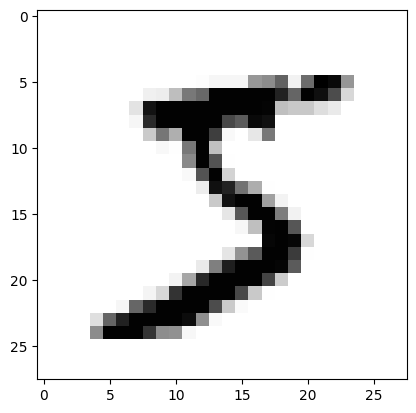

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='Greys')

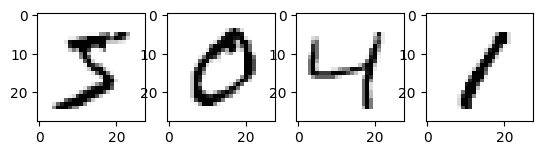

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

---
### 02 딥러닝 모델을 만들고 학습시키기
#### 딥러닝을 위한 모델 만들기와 학습 단계

In [ ]:
# 입력값 전처리 : 0에서 1 사이의 값으로 입력 데이터를 가공함
train_images, test_images = train_images / 255, test_images / 255

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 60)                47100     
                                                                 
 dense_5 (Dense)             (None, 10)                610       
                                                                 
Total params: 47710 (186.37 KB)
Trainable params: 47710 (186.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 인공신경망을 학습시켜 보자

In [ ]:
model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3247 - accuracy: 0.9082
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1611 - accuracy: 0.9530
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1171 - accuracy: 0.9656


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.1090 - accuracy: 0.9662 - 573ms/epoch - 2ms/step

테스트 정확도: 0.9661999940872192


---
#### 5 단계 : 모델의 정확도 알아보기

In [ ]:
model.fit(train_images, train_labels, epochs=3)
test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                     verbose=2)
print('\n테스트 정확도:', test_acc)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0913 - accuracy: 0.9730
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9766
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - accuracy: 0.9805
313/313 - 0s - loss: 0.0942 - accuracy: 0.9725 - 445ms/epoch - 1ms/step

테스트 정확도: 0.9725000262260437


### 03 신경망 학습의 출력값과 정답의 차이를 알아보자

In [ ]:
import numpy as np

def softmax(a):
    exp_of_a = np.exp(a)       # 각각의 지수 함수
    sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
    y = exp_of_a / sum_exp     # 각각의 확률값을 구함
    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [ ]:
np.set_printoptions(precision=4, suppress=True)
print('소프트맥스 함수의 출력 :', softmax(a))

소프트맥스 함수의 출력 : [0.0047 0.1734 0.035  0.7773 0.0095]


In [ ]:
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)).round(4))

소프트맥스 함수의 최대값 : 0.7773


In [ ]:
print('소프트맥스 함수 출력의 argmax :', np.argmax(softmax(a)))

소프트맥스 함수 출력의 argmax : 3


In [ ]:
# 소프트맥스 함수의 입력값을 두 배로 증가시켜보자
a = np.array([0.5, 4.1, 2.5, 5.6, 1.2]) * 2
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)))

신경망의 예측값 : [ 1.   8.2  5.  11.2  2.4]
소프트맥스 함수의 출력 : [0.     0.0473 0.0019 0.9506 0.0001]
소프트맥스 함수의 최대값 : 0.9505663642857384


---
#### 원-핫 인코딩과 범주형 데이터의 평균 제곱 오차

In [ ]:
from keras.utils import to_categorical

data = np.array([0, 1, 2, 3, 4])  # 수치 데이터 0에서 4까지의 값
print('인코딩할 원본 데이터',data)
encoded = to_categorical(data)    # 원-핫 인코딩된 범주형 데이터 생성
print('원-핫 인코딩된 데이터 :')
print(encoded)

인코딩할 원본 데이터 [0 1 2 3 4]
원-핫 인코딩된 데이터 :
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
color_data = ['red', 'green', 'blue']
# 리스트 축약 코드를 사용하여 딕셔너리 자료형으로 만들자.
color_dic = {v: k for v, k in enumerate(color_data)}
print('color_dic :', color_dic)

color_dic : {0: 'red', 1: 'green', 2: 'blue'}


In [ ]:
import numpy as np
from keras.utils import to_categorical

data = np.array(list(color_dic.keys()))  # 키값 0, 1, 2를 항목으로 하는 data
print('인코딩할 원본 데이터 :', data)
encoded = to_categorical(data)           # 원-핫 인코딩된 범주형 데이터 생성
print('원-핫 인코딩된 데이터 :')
print(encoded)

인코딩할 원본 데이터 : [0 1 2]
원-핫 인코딩된 데이터 :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
for i in range(len(color_data)):
    print('{:5s} : {}'.format(color_data[i], encoded[i]))

red   : [1. 0. 0.]
green : [0. 1. 0.]
blue  : [0. 0. 1.]


In [ ]:
import numpy as np

# 정답 3이 인코딩된 target과 신경망의 예측값 y_hat이 있다고 가정하자
target = np.array([0, 0, 0, 1, 0])
y_hat = np.array([0.005, 0.173, 0.035, 0.777, 0.01])

def mse(y, t):   # 평균제곱오차
    return ((y-t)**2).mean()

print('y_hat과 target과의 오차 :', mse(y_hat, target))

y_hat과 target과의 오차 : 0.016201599999999997


In [ ]:
import numpy as np

# 정답에서 많이 벗어난 other_y_hat 추정치
other_y_hat = np.array([0.1, 0.3, 0.5, 0.02, 0.08])
# other_y_hat 추정치와 정답과의 오차를 알아보자
print('other_y_hat과 target과의 오차 :', mse( other_y_hat, target ))

other_y_hat과 target과의 오차 : 0.26336


---
#### 원-핫 인코딩 데이터의 오차를 구하는 교차 엔트로피 오차

In [ ]:
# 교차 엔트로피 오차 함수를 에러 함수로 사용해 보도록 하자
def cee(y, t):
  delta = 1e-7 # 0이 되지 않도록 작은 마진 값을 준다
  return -np.sum(t * np.log(y + delta))

t = np.array([0, 0, 1]) # 세 번째 레이블이 정답값
y_hat1 = np.array([0.4, 0.05, 0.55])
y_hat2 = np.array([0.9, 0.09, 0.01])

# y_hat 추정치와 정답과의 CEE 오차를 알아보자
print('y_hat1과의 cee : {:.2f}'.format(cee(y_hat1, t)))
print('y_hat2과의 cee : {:.2f}'.format(cee(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(cee(y_hat2, t)/cee(y_hat1, t)))

# y_hat 추정치와 정답과의 MSE 오차를 알아보자
# mse() 함수는 이전에 구현한 것과 동일하다
print('y_hat1과의 mse : {:.2f}'.format(mse(y_hat1, t)))
print('y_hat2과의 mse : {:.2f}'.format(mse(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(mse(y_hat2, t)/mse(y_hat1, t)))

y_hat1과의 cee : 0.60
y_hat2과의 cee : 4.61
두 값의 비 : 7.70
y_hat1과의 mse : 0.12
y_hat2과의 mse : 0.60
두 값의 비 : 4.93
